In [54]:
%display latex

# Homework 9

Ngl, this one is taking wayyyyyyy longer than expected, and I just needed a fresh notebook, my brain was starting not to feel to great.

So we restart, we use the good old white board, and try to take it nice and methodically slow.


## Problem 4

Light enters the left side of a triangular glass prism with an apex angle of 49.0O so that the angle of incidence is 24.0O. The light emerges from the right side of the prism with a total deviation of 57.0O. Find the index of refraction of the glass.  

In [120]:
# So I tried give the whiteboard thing a shot; If I am going to be honest, did not help at all :(
# So I do it normally

apex_angle, angle_of_incidence, total_deviation = var('alpha theta1 delta')

apex_angle_n = alpha == 49 # deg 
angle_of_incidence_n = theta1 == 24 # deg 
total_deviation_n = thetad == 57 # deg

phi(theta, N) = theta - N
phi_inv(theta, N) = theta + N

N1 = pi - alpha / 2
N2 = alpha / 2

var('theta2 theta3 theta4 n')
eq1 = phi_inv(theta1, N1) + delta == phi_inv(pi - theta4, N2)
eq2 = phi_inv(pi - theta2, N1) == phi_inv(theta3, N2)
show(eq1)
show(eq2)

eq1 = eq1.lhs() - eq1.rhs() == 0
eq2 = eq2.lhs() - eq2.rhs() == 0
show(eq1)
show(eq2)

req1 = sin(theta1) == n * sin(theta2)
req2 = n * sin(theta3) == sin(theta4)

eq = eq1.lhs() + eq2.lhs() + req1.lhs() - req1.rhs() + req2.lhs() - req2.rhs()==0
show(eq.simplify())

# Im tired of this. Like bruh. This was wayyyyyy toooo much.
# I am just going to solve everything as vectors now.

pi - 1/2*alpha + delta + theta1 == pi + 1/2*alpha - theta4

2*pi - 1/2*alpha - theta2 == 1/2*alpha + theta3

-alpha + delta + theta1 + theta4 == 0

2*pi - alpha - theta2 - theta3 == 0

2*pi - n*sin(theta2) + n*sin(theta3) - 2*alpha + delta + theta1 - theta2 - theta3 + theta4 + sin(theta1) - sin(theta4) == 0

##  Problem 6

A light ray in air is incident on the top surface of a rectangular block of glass with angle a = 27.0O, as shown in the picture below. The glass block is  x = 6.16 cm thick and its index of refraction is 1.54. Find d, the separation between the exiting ray and the path of the original ray, in centimeters.

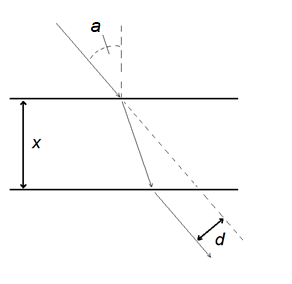)

(0.196682294642775, -0.980467273790437)

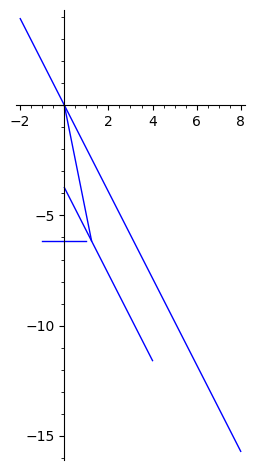

1.69556514831860

In [173]:
n = 1.54
x = 6.16
a = (27.0 * pi) / 180

d1 = vector([sin(a), -cos(a)])
d2 = (vector([0, 1]) * (d1[1] * n) + d1).normalized()
d3 = d1

show(d2.n())
t1 = solve((d2 * t)[1] == -x,t)[0].rhs()
t2 = solve((d1 * t)[1] == -x,t)[0].rhs()

var('t y z')

l1 = d1 * t
l2 = d1 * t + d2 * t1
l3 = d2 * t

eq1 = l1[1].subs(solve(z == l1[0], t)[0])
eq2 = l2[1].subs(solve(z == l2[0], t)[0])
eq3 = l3[1].subs(solve(z == l3[0], t)[0])

show(plot(eq1, (z, -2, 8), aspect_ratio=1) + 
     plot(eq2, (z, 0, 4), aspect_ratio=1) + 
     plot(eq3, (z, 0, (d2 * t1)[0]), aspect_ratio=1) + 
     plot(-x))


c = (((d2 * t1) * d1) * d1 - d2 * t1).norm()
show(c.n())

In [163]:
plot?

Signature:     
plot(
    funcs,
    alpha=1,
    thickness=1,
    fill=False,
    fillcolor='automatic',
    fillalpha=0.5,
    plot_points=200,
    adaptive_tolerance=0.01,
    adaptive_recursion=5,
    detect_poles=False,
    exclude=None,
    legend_label=None,
    aspect_ratio='automatic',
    imaginary_tolerance=1e-08,
    *args,
    **kwds,
)
Docstring:     
   Use plot by writing.

   "plot(X, ...)"

   where X is a Sage object (or list of Sage objects) that either is
   callable and returns numbers that can be coerced to floats, or has
   a plot method that returns a "GraphicPrimitive" object.

   There are many other specialized 2D plot commands available in
   Sage, such as "plot_slope_field", as well as various graphics
   primitives like "Arrow"; type "sage.plot.plot?" for a current list.

   Type "plot.options" for a dictionary of the default options for
   plots. You can change this to change the defaults for all future
   plots. Use "plot.reset()" to reset to the defaul